In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv('../data/LightsOut2022_Captains_Results.csv')

# First entry (index=0) was a test entry (2022-01-06) made by DW to test out the form.
# Form wasn't live until 2022-01-08.
# Removing this entry.
data.drop(0, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

# Rename columns
renamed_columns = [i-2 if ('Captain Tandems' in col) else col for i, col in enumerate(data.columns)]
data.fillna(value='n/a - NotSelected', inplace=True)
data.columns = renamed_columns
data.head()

,Timestamp,Gender Balance Preference,How many captains should we elect?,1,2,3,4,5,6,7,8,9,10,11
0,2022/01/08 7:45:20 AM PST,n/a - NotSelected,3,"Anna, Kate, Peaches","Anna, Kate, Wade","Anna, Kate, Wade, Peaches","Anna, Kate","Anna, Peaches","Kate, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Wade","Kate, Wade","Wade, Peaches"
1,2022/01/08 7:50:55 AM PST,I would prefer an even number of female-matchi...,4,"Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate, Peaches","Anna, Peaches","Kate, Peaches","Wade, Peaches","Kate, Wade","Anna, Kate, Wade","Anna, Wade","Anna, Kate"
2,2022/01/08 8:14:28 AM PST,I would prefer an even number of female-matchi...,n/a - NotSelected,"Anna, Kate, Wade, Peaches","Anna, Kate, Peaches","Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Wade, Peaches","Kate, Peaches","Anna, Peaches","Anna, Kate","Kate, Wade","Anna, Wade","Wade, Peaches"
3,2022/01/08 8:34:24 AM PST,I have no preference.,4,"Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Anna, Kate, Peaches","Anna, Kate, Wade","Kate, Wade, Peaches","Anna, Peaches","Kate, Peaches","Kate, Wade","Anna, Wade","Wade, Peaches","Anna, Kate"
4,2022/01/08 8:50:17 AM PST,I have no preference.,3,"Anna, Kate, Wade","Anna, Wade, Peaches","Anna, Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Kate, Peaches","Kate, Wade, Peaches","Anna, Wade","Anna, Kate","Kate, Wade","Kate, Peaches","Wade, Peaches"


I have no preference.                                                                         13
I would prefer an even number of female-matching and male-matching captains.                  11
n/a - NotSelected                                                                              2
I would prefer that there aren't more male-matching captains than female-matching captains     1
I would prefer the leadership team (including coaches) to be at least half womxn               1
Name: Gender Balance Preference, dtype: int64


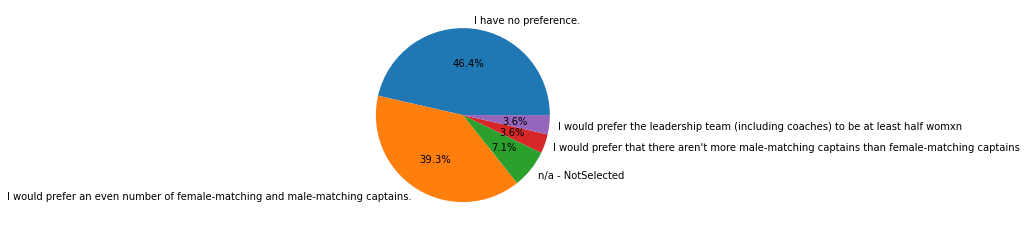

In [3]:
# Look at results for Gender balance

def display_gender_balance(data): 
    gender_counts = data['Gender Balance Preference'].value_counts()
    print(gender_counts)
    plt.figure(facecolor='w')
    plt.pie(x=gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
    plt.show()
    
display_gender_balance(data)

4                    11
3                     8
n/a - NotSelected     4
2                     4
3 or 4                1
Name: How many captains should we elect?, dtype: int64


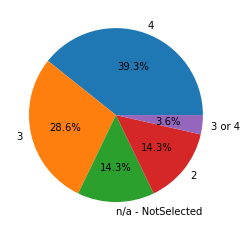

In [4]:
# Look at results for number of captains

def display_results_number_captains(data):
    number_counts = data['How many captains should we elect?'].value_counts()
    print(number_counts)
    plt.figure(facecolor='w')
    plt.pie(x=number_counts.values, labels=number_counts.index, autopct='%1.1f%%')
    plt.show()
    
display_results_number_captains(data)

In [5]:
# Look at captain sets preferences

def get_captain_tandem_results(data):
    captain_data_raw = data[[col for col in data.columns if type(col)==int]]

    # Calculate the point value for each option
    captain_data = pd.melt(captain_data_raw, value_vars=list(range(1,12)), value_name='Tandem', var_name='Rank')
    captain_data['Points'] = 12-captain_data['Rank']

    captain_results = captain_data[['Tandem','Points']].groupby('Tandem').agg(sum).sort_values('Points', ascending=False)

    return captain_data, captain_results

captain_data, captain_results = get_captain_tandem_results(data)

captain_results

,Points
Tandem,
"Anna, Kate, Wade, Peaches",278
"Anna, Kate, Peaches",242
"Anna, Kate, Wade",240
"Anna, Wade, Peaches",204
"Anna, Peaches",177
"Kate, Wade, Peaches",160
"Anna, Kate",135
"Anna, Wade",133
"Kate, Peaches",115


In [6]:
# Get breakdown of each tandem

def get_tandem_data(captain_results, captain_data):
    tandem_data = pd.concat([captain_data['Tandem'], pd.get_dummies(captain_data['Rank'])], axis=1)
    tandem_data = tandem_data.groupby('Tandem').agg(sum)
    tandem_data['TotalPoints'] = captain_results
    tandem_data.sort_values('TotalPoints', ascending=False, inplace=True)
    return tandem_data

tandem_data = get_tandem_data(captain_results, captain_data)

tandem_data

,1,2,3,4,5,6,7,8,9,10,11,TotalPoints
Tandem,,,,,,,,,,,,
"Anna, Kate, Wade, Peaches",13,3,4,4,2,1,1,1,1,1,3,278
"Anna, Kate, Peaches",4,7,8,3,3,0,1,0,2,0,0,242
"Anna, Kate, Wade",5,7,4,5,1,2,1,1,2,2,1,240
"Anna, Wade, Peaches",0,8,2,7,3,2,2,0,1,2,0,204
"Anna, Peaches",4,1,2,1,2,9,2,2,3,1,0,177
"Kate, Wade, Peaches",0,0,3,2,8,2,3,7,2,0,0,160
"Anna, Kate",1,0,3,3,0,5,2,5,1,3,4,135
"Anna, Wade",1,1,0,1,4,0,8,4,4,4,0,133
"Kate, Peaches",0,1,1,1,1,5,4,3,4,3,1,115


In [7]:
# Look at subsets based on number of captains desired

for num_captains in ['4', '3', '2', 'n/a - NotSelected']:
    num_people_in_group = data['How many captains should we elect?'].value_counts()[num_captains]
    subset = data[data['How many captains should we elect?']==num_captains]
    captain_data_here, captain_results_here = get_captain_tandem_results(subset)
    tandem_data_here = get_tandem_data(captain_results_here, captain_data_here)
    
    print(f"\n{num_captains} captains preferred (n = {num_people_in_group})")
    print(tandem_data_here)
    
    


4 captains preferred (n = 11)
                            1  2  3  4  5  6  7  8  9  10  11  TotalPoints
Tandem                                                                    
Anna, Kate, Wade, Peaches  11  0  0  0  0  1  1  1  1   1   1          142
Anna, Kate, Peaches         0  3  5  1  1  0  0  0  1   0   0           93
Anna, Kate, Wade            0  4  2  3  0  0  0  0  1   1   0           87
Anna, Wade, Peaches         0  4  1  3  1  0  0  0  0   1   0           82
Kate, Wade, Peaches         0  0  2  1  5  0  0  1  1   0   0           68
Anna, Peaches               0  0  1  1  1  4  1  1  2   0   0           63
Anna, Wade                  0  0  0  0  2  0  4  2  1   1   0           47
Kate, Wade                  0  0  0  0  1  1  2  3  1   3   2           46
Kate, Peaches               0  0  0  0  0  2  2  2  2   1   0           38
Anna, Kate                  0  0  0  1  0  3  0  0  0   2   4           34
Wade, Peaches               0  0  0  1  0  0  1  1  1   1   4        